In [ ]:
! pip install nltk

In [ ]:
from nltk.corpus import stopwords
import nltk

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd

In [ ]:
# use a txt file
from google.colab import drive # giving access of drive to google colab
drive.mount('/drive')

Mounted at /drive


In [ ]:
df = pd.read_csv("/drive/My Drive/Message_Data_Spam.csv",encoding = "Latin-1")


In [ ]:
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df["len_message"]= df["v2"].apply(lambda x: len(x)) # counting number of characters in the message including space

In [ ]:
df.rename(columns = {"v2":"message"}, inplace = True)

In [ ]:
df["words_count"] = df["message"].apply(lambda x: len(x.split())) # count of number of words in the message

In [ ]:
df

,v1,message,len_message,words_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,30
5568,ham,Will Ì_ b going to esplanade fr home?,37,8
5569,ham,"Pity, * was in mood for that. So...any other s...",57,10
5570,ham,The guy did some bitching but I acted like i'd...,125,26


In [ ]:
# Normalization -> by converting all characters as lower case for uniformity
df["message"] = df["message"].str.lower()

In [ ]:
# removing noise or special characters in the message

import re  # importing regular expression
# everything but alphabet and numbers
ch = "[^A-Za-z0-9\s]"
df["message"] = df["message"].apply(lambda x: re.sub(ch,"",x))

In [ ]:
df

,v1,message,len_message,words_count
0,ham,go until jurong point crazy available only in ...,111,20
1,ham,ok lar joking wif u oni,29,6
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155,28
3,ham,u dun say so early hor u c already then say,49,11
4,ham,nah i dont think he goes to usf he lives aroun...,61,13
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,161,30
5568,ham,will b going to esplanade fr home,37,8
5569,ham,pity was in mood for that soany other suggest...,57,10
5570,ham,the guy did some bitching but i acted like id ...,125,26


In [ ]:
# removing stopwords
from nltk.corpus import stopwords
nltk.download("stopwords")
sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df["message"] = df["message"].apply(lambda x: " ".join([i for i in x.split() if i not in sw])) # stopwrods are removed from message

In [ ]:
# stemming technique
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Create a stemmer instance
stemmer = PorterStemmer()


# Apply stemming to each word
df.message.apply(lambda x: " ".join([stemmer.stem(i) for i in word_tokenize(x)]))




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
5568                                b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [ ]:
# lemmatizing
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
nltk.download('wordnet')

# Create a lemmatizer instance
lemmatizer = WordNetLemmatizer()







[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:

# Apply lemmatization to each word using the appropriate POS tag
df.message = df.message.apply(lambda x: " ".join([lemmatizer.lemmatize(i,pos="v") for i in x.split()]))

In [ ]:
df["len_message"]= df["message"].apply(lambda x: len(x))
df["words_count"] = df["message"].apply(lambda x: len(x.split()))

In [ ]:
df

,v1,message,len_message,words_count
0,ham,go jurong point crazy available bugis n great ...,82,16
1,ham,ok lar joke wif u oni,21,6
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,135,23
3,ham,u dun say early hor u c already say,35,9
4,ham,nah dont think go usf live around though,40,8
...,...,...,...,...
5567,spam,2nd time try 2 contact u u 750 pound prize 2 c...,108,20
5568,ham,b go esplanade fr home,22,5
5569,ham,pity mood soany suggestions,27,4
5570,ham,guy bitch act like id interest buy something e...,72,14


In [ ]:
df = df.drop_duplicates("message")

In [ ]:
df

,v1,message,len_message,words_count
0,ham,go jurong point crazy available bugis n great ...,82,16
1,ham,ok lar joke wif u oni,21,6
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,135,23
3,ham,u dun say early hor u c already say,35,9
4,ham,nah dont think go usf live around though,40,8
...,...,...,...,...
5567,spam,2nd time try 2 contact u u 750 pound prize 2 c...,108,20
5568,ham,b go esplanade fr home,22,5
5569,ham,pity mood soany suggestions,27,4
5570,ham,guy bitch act like id interest buy something e...,72,14


In [ ]:
df.describe()

,len_message,words_count
count,5112.000000,5112.000000
mean,50.935055,9.200117
std,39.618797,6.703671
min,0.000000,0.000000
25%,22.000000,4.000000
50%,37.000000,7.000000
75%,73.000000,13.000000
max,508.000000,80.000000


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

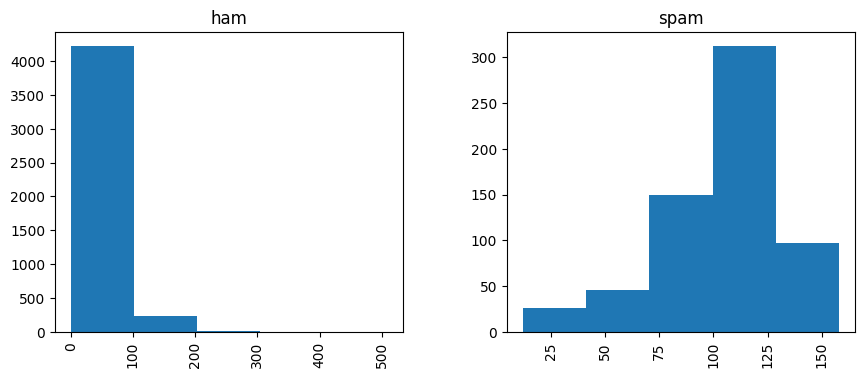

In [ ]:
df.hist(column = 'len_message', by ='v1',figsize=(10,4), bins = 5)


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

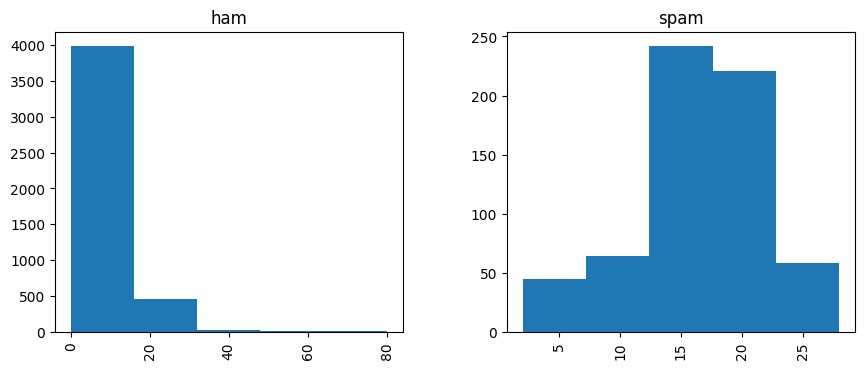

In [ ]:
df.hist(column = 'words_count', by ='v1',figsize=(10,4), bins = 5)

In [ ]:
# finding most and least used words
term_frequency = pd.DataFrame(" ".join(df.message).split()).value_counts()

In [ ]:
most_freq_words = term_frequency.head(8)

In [ ]:
least_freq_words = term_frequency[term_frequency<=1]

In [ ]:
df["message"] = df["message"].apply(lambda x: " ".join([i for i in x.split() if i not in most_freq_words]))
df["message"] = df["message"].apply(lambda x: " ".join([i for i in x.split() if i not in least_freq_words]))


<ipython-input-32-d297094f0125>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["message"] = df["message"].apply(lambda x: " ".join([i for i in x.split() if i not in most_freq_words]))
<ipython-input-32-d297094f0125>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["message"] = df["message"].apply(lambda x: " ".join([i for i in x.split() if i not in least_freq_words]))


In [ ]:
df = df.drop(["words_count","len_message"],axis = 1)

In [ ]:
df

,v1,message
0,ham,point crazy available bugis n great world la e...
1,ham,ok lar joke wif oni
2,spam,free entry wkly comp win fa cup final tkts 21s...
3,ham,dun say early hor c already say
4,ham,nah dont think usf live around though
...,...,...
5567,spam,2nd time try contact 750 pound prize claim eas...
5568,ham,b esplanade fr home
5569,ham,mood
5570,ham,guy bitch act like id interest buy something e...


In [ ]:
df["v1"] = np.where(df["v1"]=="ham","1","0")

In [ ]:
df["v1"] = df["v1"].astype(int)

In [ ]:
df

,v1,message
0,1,point crazy available bugis n great world la e...
1,1,ok lar joke wif oni
2,0,free entry wkly comp win fa cup final tkts 21s...
3,1,dun say early hor c already say
4,1,nah dont think usf live around though
...,...,...
5567,0,2nd time try contact 750 pound prize claim eas...
5568,1,b esplanade fr home
5569,1,mood
5570,1,guy bitch act like id interest buy something e...


In [ ]:
# count vectorization

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df["message"]
y = df["v1"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 20)

In [ ]:
x_train = cv.fit_transform(x_train)

In [ ]:
x_test = cv.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.9797913950456323

In [ ]:
metrics.recall_score(y_test,y_pred)

0.9985261606484893

In [ ]:
metrics.precision_score(y_test,y_pred)

0.9790462427745664

In [ ]:
metrics.roc_auc_score(y_test,y_pred)

0.9173421763694424